In [1]:
import pandas as pd
import pandas_flavor as pf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
linear_fill_df = pd.read_csv('../data/linear_fill.csv')

In [3]:
# Calculate GDP change

# Grouping by country means subsequent operations will be performed for each country individually
# GDP.apply() means we are taking the value for GDP_Per_Capita and using it for each country as x in our lambda function, 
# which takes the first and last values using integer location, since we are grouping by GDP we can use iloc[0] to grab first value and subtracting
# that from the last value iloc[-1]

gdp_change = linear_fill_df.groupby('country')['GDP_Per_Capita'].apply(lambda x: x.iloc[-1] - x.iloc[0])

# Top 5 countries with greatest positive change
top_positive = gdp_change.nlargest(5).index.tolist()

# Top 5 countries with greatest negative change
top_negative = gdp_change.nsmallest(5).index.tolist()

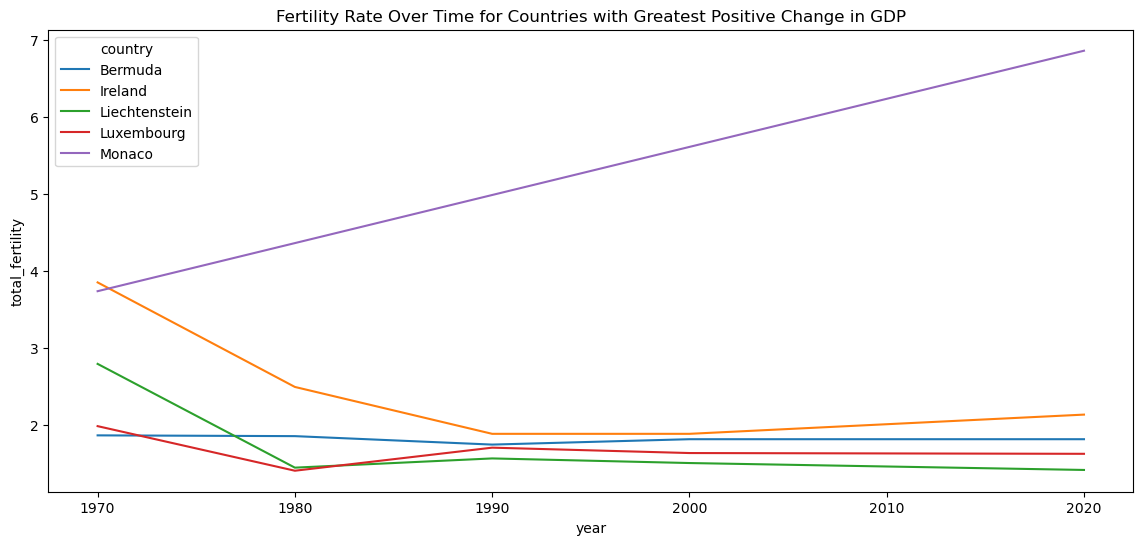

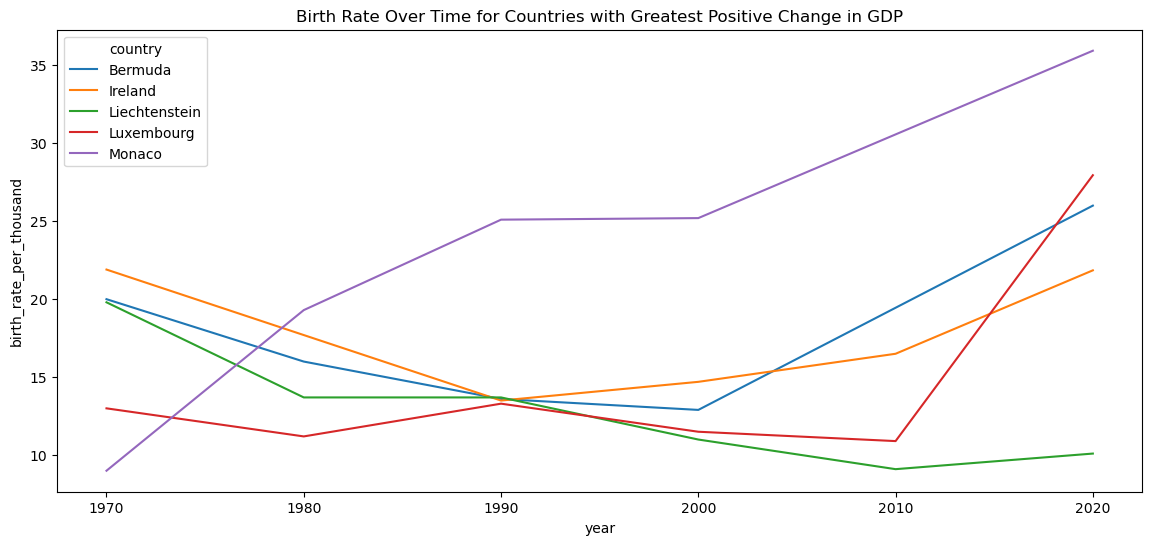

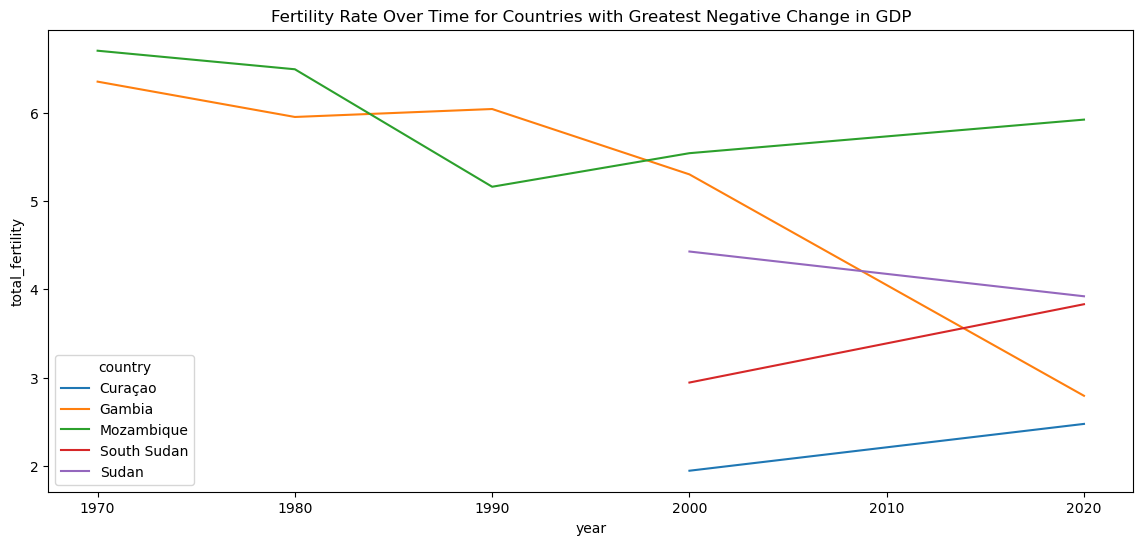

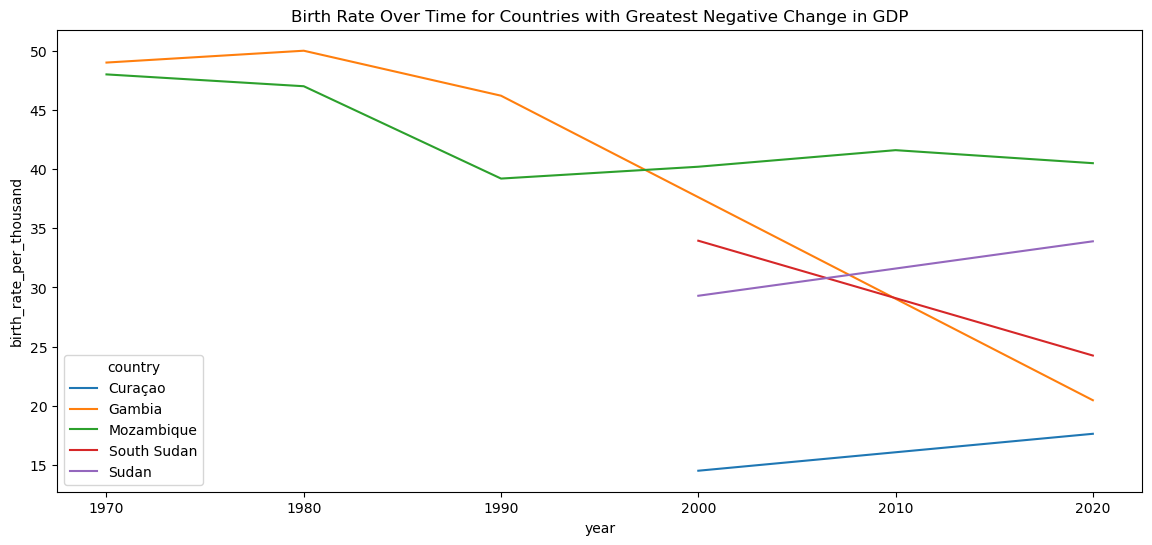

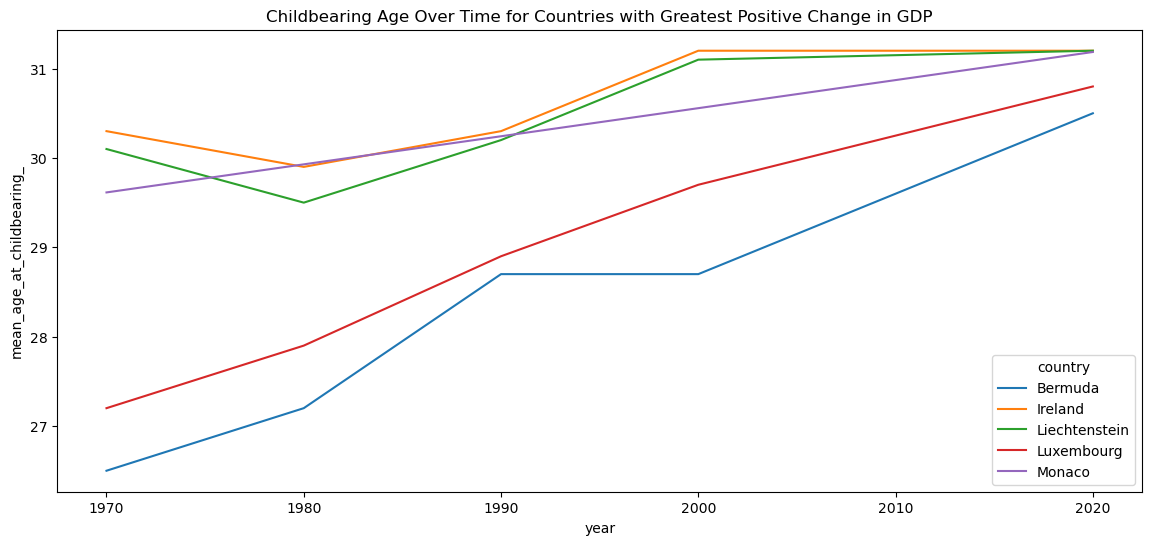

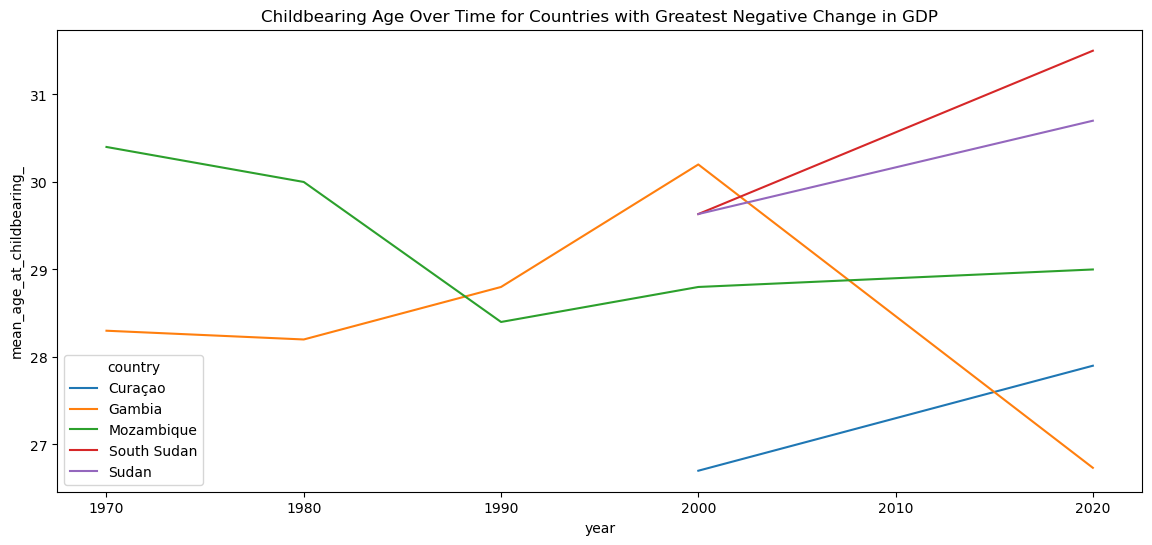

In [4]:
# Filter the DataFrame for top countries
positive_df = linear_fill_df[linear_fill_df['country'].isin(top_positive)]
negative_df = linear_fill_df[linear_fill_df['country'].isin(top_negative)]

# Plotting fertility rate for countries with greatest positive GDP change
plt.figure(figsize=(14, 6))
sns.lineplot(data=positive_df, x='year', y='total_fertility', hue='country')
plt.title("Fertility Rate Over Time for Countries with Greatest Positive Change in GDP")
plt.show()

# Plotting birth rate for countries with greatest positive GDP change
plt.figure(figsize=(14, 6))
sns.lineplot(data=positive_df, x='year', y='birth_rate_per_thousand', hue='country')
plt.title("Birth Rate Over Time for Countries with Greatest Positive Change in GDP")
plt.show()

# Plotting fertility rate for countries with greatest negative GDP change
plt.figure(figsize=(14, 6))
sns.lineplot(data=negative_df, x='year', y='total_fertility', hue='country')
plt.title("Fertility Rate Over Time for Countries with Greatest Negative Change in GDP")
plt.show()

# Plotting birth rate for countries with greatest negative GDP change
plt.figure(figsize=(14, 6))
sns.lineplot(data=negative_df, x='year', y='birth_rate_per_thousand', hue='country')
plt.title("Birth Rate Over Time for Countries with Greatest Negative Change in GDP")
plt.show()

# Plotting age at childbearing for countries with greatest negative GDP change
plt.figure(figsize=(14, 6))
sns.lineplot(data=positive_df, x='year', y='mean_age_at_childbearing_', hue='country')
plt.title("Childbearing Age Over Time for Countries with Greatest Positive Change in GDP")
plt.show()

# Plotting age at childbearing for countries with greatest negative GDP change
plt.figure(figsize=(14, 6))
sns.lineplot(data=negative_df, x='year', y='mean_age_at_childbearing_', hue='country')
plt.title("Childbearing Age Over Time for Countries with Greatest Negative Change in GDP")
plt.show()